# <span style='color:OrangeRed'>V9 ZUSTANDSREKONSTRUKTION MITTELS BEOBACHTER - TEIL 1</span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Gegeben ist die Zustandsraumdarstellung einer zeitkontinuierlichen Regelstrecke:

In [90]:
A = [-7 -12;1 0]
B = [1; 0]
C = [46 -25]
D = 0

A =

   -7  -12
    1    0

B =

   1
   0

C =

   46  -25

D = 0


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Diskretisieren Sie das Zustandsraummodell der zeitkontinuierlichen Regelstrecke
unter Verwendung eines Haltegliedes 0. Ordnung. Verwenden Sie hierbei zur
Berechnung der Fundamentalmatrix das Cayley-Hamilton Theorem. Die Abtastzeit
beträgt Ts = 0,1 sec.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Im ersten Schritt müssen wir die Eigenwerte berechnen.

In [91]:
p = eigs(A)

p =

  -4
  -3



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Dann wenden wir das Caley-Hamilton-Theorem an:

In [92]:
Ts = 0.1;
Ac = [1 p(1);1 p(2)]
Bc = [expm(p(1)*Ts);expm(p(2)*Ts)]
alfa = inv(Ac)*Bc

Ac =

   1  -4
   1  -3

Bc =

   0.67032
   0.74082

alfa =

   0.952313
   0.070498



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Und dann:

In [93]:
F = alfa(1)*eye(2)+alfa(2)*A
eigs(F)

F =

   0.458826  -0.845978
   0.070498   0.952313

ans =

   0.74082
   0.67032



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Die andere Matrix können wir so berechnen:

In [94]:
G = (F-eye(2))*inv(A)*B

G =

   0.0704982
   0.0039739



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Welche Voraussetzung muss erfüllt sein, um das zeitdiskrete Zustandsraummodell
 mittels einer Transformationsmatrix T in die Beobachtungsnormalform
zu überführen? Falls möglich, bestimmen Sie die Transformationsmatrix T
und geben Sie das Zustandsraummodell der zeitdiskreten Regelstrecke in Beobachtungsnormalform an.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Damit die Transformationsmatrix T, die das System in die Regelungsnormalform überführt,
existiert, muss das System vollständig beobachtbar sein. Die Transformationsmatrix
ist eine Funktion der invertierten Beobachtbarkeitsmatrix, die nur invertiert werden
kann, falls sie vollen Rang hat. Die Anforderung, dass die Beobachtbarkeitsmatrix über
einen vollen Rang verfügt, entspricht der Voraussetzung, dass das System vollständig
beobachtbar ist.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Die Beobachtarkeitmatrix lautet:

In [95]:
So = [C; C*F]

So =

   46.000  -25.000
   19.344  -62.723



In [96]:
det(So)

ans = -2401.7


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Die Determinante ist nicht null, d.h. das System ist beobachtbar.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Wir berechnen jetzt die M-Matrix.

In [97]:
t1 = inv(So)*[0; 1]

t1 =

  -0.010409
  -0.019153



In [98]:
M = [t1 F*t1]

M =

  -0.010409   0.011427
  -0.019153  -0.018974



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Wenn wir die Transformation anwenden:

In [99]:
Fb = inv(M)*F*M
Gb = inv(M)*G
Cb = C*M
eigs(Fb)

Fb =

   5.5511e-17  -4.9659e-01
   1.0000e+00   1.4111e+00

Gb =

  -3.3216
   3.1436

Cb =

   5.5511e-17   1.0000e+00

ans =

   0.74082
   0.67032



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Für die gegebene zeitdiskrete Regelstrecke  soll ein Zustandsbeobachter
ausgelegt werden. Berechnen Sie die Beobachterverstärkung so, dass die Beobachterpolstellen
bei z = 0,2 ± j · 0,2 liegen.

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Das gewünschte charakteristiche Polynom des Beobachters ist durch die Polstellenvorgabe
in der Aufgabenstellung vorgegeben worden, d.h.:

In [100]:
p1 = 0.2+1j*0.2
p2 = 0.2-1j*0.2
Pb = conv([1 -p1],[1 -p2])

p1 =  0.20000 + 0.20000i
p2 =  0.20000 - 0.20000i
Pb =

   1.000000  -0.400000   0.080000



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Für die Auslegung wenden wir die Normalform an und dann:

In [101]:
fb2 = Pb(2)+Fb(2,2)
fb1 = Pb(3)+Fb(1,2)
Kb = [fb1 fb2]'

fb2 =  1.0111
fb1 = -0.41659
Kb =

  -0.41659
   1.01114



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Durch eine Simulation können wir unser Ergebnis testen.

xo =

   2
   2

xb =

   0
   0



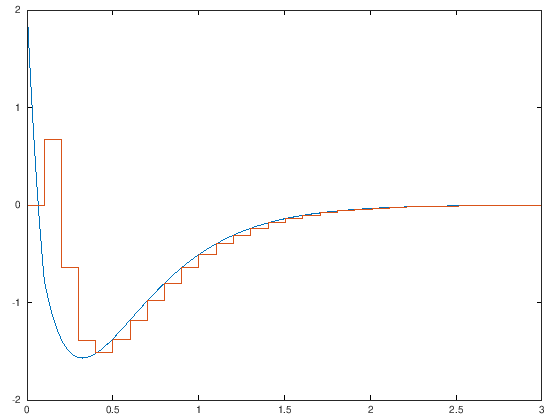

In [102]:
% Set the Octsim Engine to run the simulation
addpath('../Octsim');

% Simulation Parameters
% Start time
tini = 0;
% End time
tfinal = 3;
% Time Step
dt = 0.001;
% Number of data flows in the schematic
nflows = 6;


% Instance of the simulation schematic
sc1 = Schema(tini,tfinal,dt,nflows);

% We measure both state variables
Cs = eye(2);

% Initial Conditions
xo = [2; 2]
xb = [0; 0]

% List of components
c1{1} = StepSource(1,0,10,0.1);
% Continuous time system with output all the state variables
c1{2} = StateSpace(1,[2 3],A,B,Cs,D,xo);
% Calculate output of the system from the state variables
c1{3} = Gain([2 3],4,C);
% Observer with as input the input the system and the output of the system
c1{4} = DTStateSpace([1 4],[5 6],Fb-Kb*Cb,[Gb Kb],Cs,D,Ts,xb);
% Convert state variables from the canonical form to the original state representation  
c1{5} = Gain([5 6],[7 8],M);

sc1.AddListComponents(c1);

% Run the schematic and plot
out1 = sc1.Run([2 7]);
plot(out1(1,:),out1(2,:),out1(1,:),out1(3,:));